<h2>Steel plate problem with random position and radius</h2>

\begin{align*}
    \frac{E(x, \omega_1)}{2 (1 + \nu)} \cdot \nabla^2 u(x, \omega) + \frac{E(x, \omega_1)}{2 (1 - \nu)} \cdot \nabla(\nabla \cdot u(x, \omega)) + b = 0 \hspace{1cm} & | \: x \in D(\omega_2) \\
    u(x, \omega) = 0 \hspace{1cm} & | \: x \in \Gamma_1 \\
    \sigma(u, x) \cdot n(x) = g \hspace{1cm} & | \: x \in \Gamma_2
\end{align*}

with random position and radius perturbation function like this:

<img src="../../images/6_steel_plate_problem/perturbed_mesh_sample_circle_random_field.png">

In [ ]:
from helpers import *

In [ ]:
# Define constants and calculate KLEs for random fields

mesh_resolution = 14
mesh_resolutionE = 6
mesh_resolutionVBar = 6
randomFieldVBar = calculate_randomFieldVBar(mesh_resolutionVBar)
randomFieldE = calculate_randomFieldE(mesh_resolutionE)

In [ ]:
# Analyze the maximal perturbation of the random field

print(f"Eigenvalues of randomFieldVBar: {randomFieldVBar.eigenvalues.shape}")
print(f"Shape of eigenvectors: {randomFieldVBar.eigenvectors.shape}") # (2M, M)
M_max = randomFieldVBar.eigenvalues.shape[0]

def get_max_perturbation_for_M(M: int):
    return np.sqrt(3) * np.sum([np.sqrt(randomFieldVBar.eigenvalues[m]) * np.max(np.abs(randomFieldVBar.eigenvectors[:, m])) for m in range(M)])

max_perturbation = 0
M_array = np.arange(0, M_max)
for M in M_array:
    print(f"m: {M+1}, perturbation: {get_max_perturbation_for_M(M)}")
# -> even with M=J we have a maximal perturbation of < 0.076

Eigenvalues of randomFieldVBar: (128,)
Shape of eigenvectors: (256, 128)
m: 1, perturbation: 0.0
m: 2, perturbation: 0.029807444100570686
m: 3, perturbation: 0.05427883035317867
m: 4, perturbation: 0.06049639475366193
m: 5, perturbation: 0.06648990851997844
m: 6, perturbation: 0.06962891346198248
m: 7, perturbation: 0.07265653185059143
m: 8, perturbation: 0.07316937842660882
m: 9, perturbation: 0.07367100900488023
m: 10, perturbation: 0.07394965102818844
m: 11, perturbation: 0.07407668167520066
m: 12, perturbation: 0.07420433433175393
m: 13, perturbation: 0.07425202191158911
m: 14, perturbation: 0.07429970949142428
m: 15, perturbation: 0.07433661542197394
m: 16, perturbation: 0.07436417804110684
m: 17, perturbation: 0.07438784327789201
m: 18, perturbation: 0.07441150851467718
m: 19, perturbation: 0.07442580784231158
m: 20, perturbation: 0.07444010716994597
m: 21, perturbation: 0.07445187111713757
m: 22, perturbation: 0.07446363506432918
m: 23, perturbation: 0.07447519062529052
m: 24, p

In [ ]:
# Sample the random variables
omega1 = sample_omega1(randomFieldE)
omega2 = sample_omega2(randomFieldVBar)
q = sample_q()

Building point search tree to accelerate distance queries.
Computed bounding box tree with 255 nodes for 128 points.


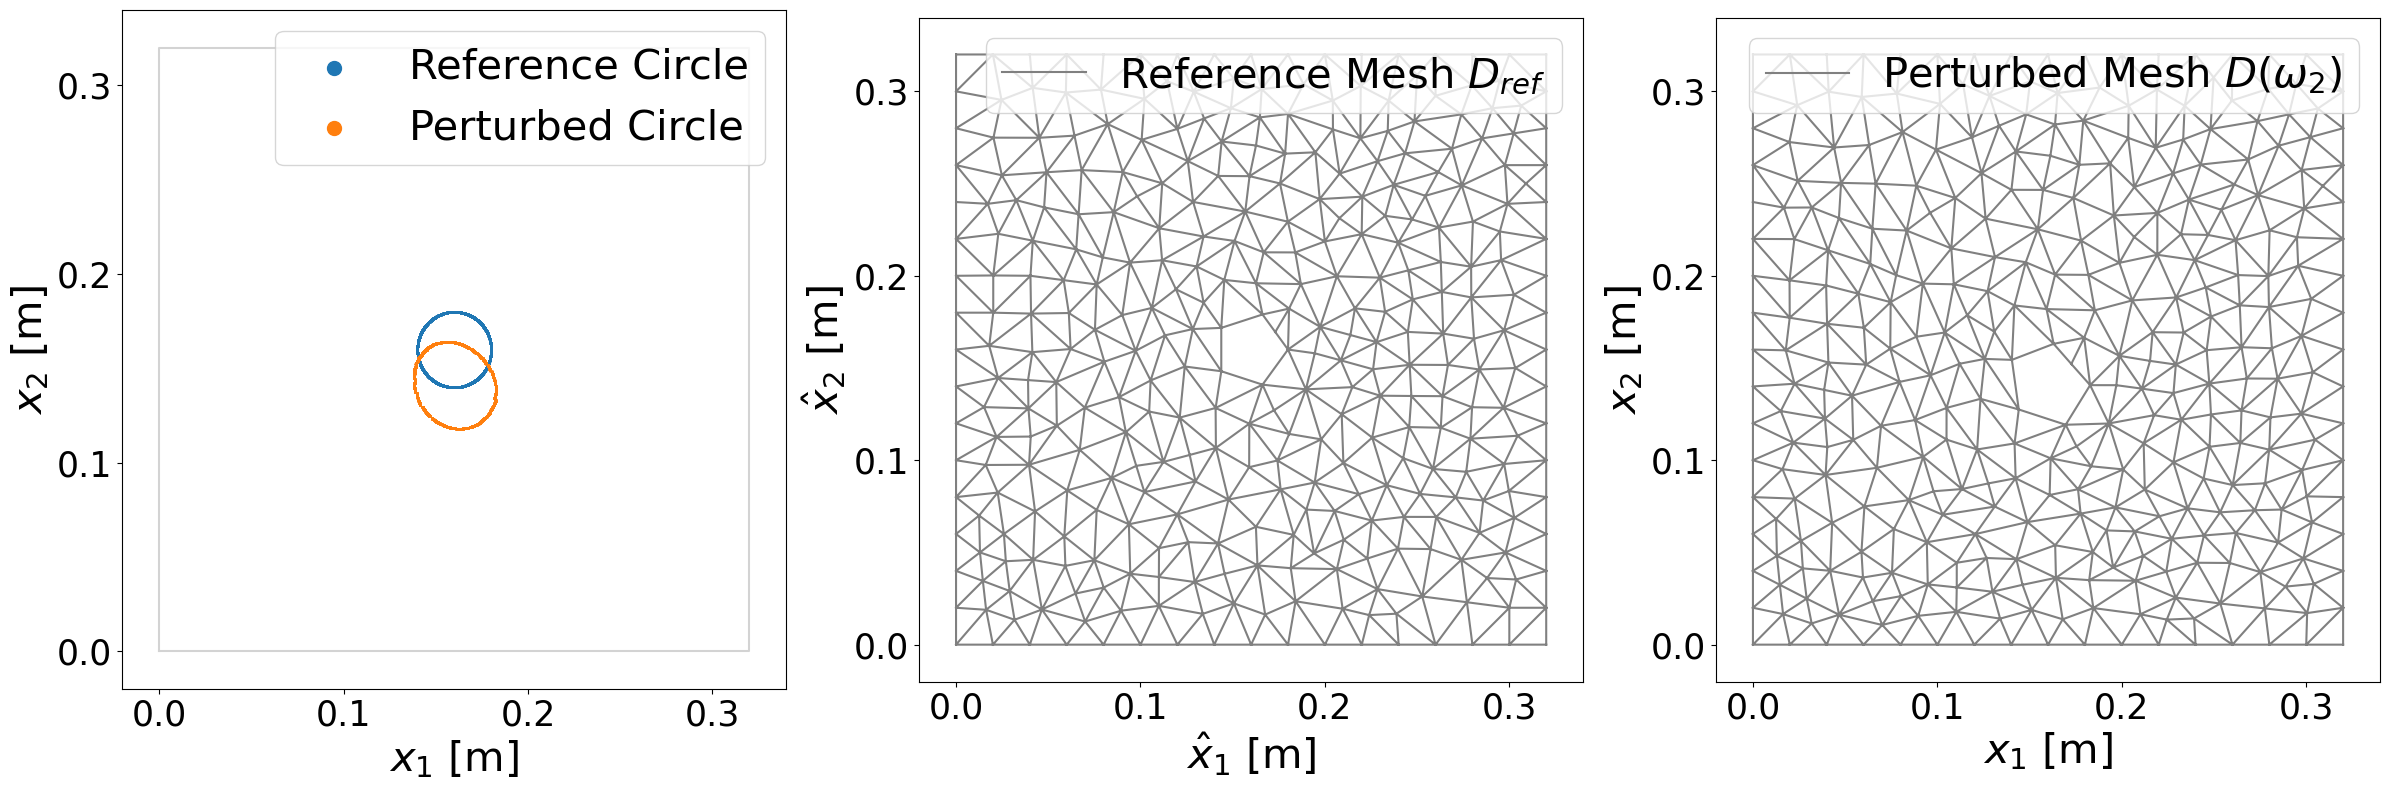

In [ ]:
"""Plot a sample of a perturbed mesh.
Create the image: images/6_steel_plate_problem/perturbed_mesh_sample_circle_random_field.png"""

r = 0.02
mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2, r, randomFieldVBar)

# Create points on the circle
thetas = np.linspace(0, 2 * np.pi, 5000)
circle_points = np.array([0.16 + 0.02 * np.cos(thetas), 0.16 + 0.02 * np.sin(thetas)]).T
perturbed_circle_points = np.array([perturbation_function(circle_point, omega2, r, randomFieldVBar) for circle_point in circle_points])


# Plots
plt.figure(figsize=(24, 8))

# Plot circle and perturbed points
ax = plt.subplot(1, 3, 1)
plt.scatter(circle_points[:, 0], circle_points[:, 1], label='Reference Circle', s=1)
plt.scatter(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], label='Perturbed Circle', s=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30, markerscale=10)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 2)
fe.plot(mesh, label=r'Reference Mesh $D_{ref}$')
plt.xlabel(r'$\hat{x}_1$ [m]', fontsize=30)
plt.ylabel(r'$\hat{x}_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

ax = plt.subplot(1, 3, 3)
fe.plot(perturbed_mesh, label=r'Perturbed Mesh $D(\omega_2)$')
plt.xlabel(r'$x_1$ [m]', fontsize=30)
plt.ylabel(r'$x_2$ [m]', fontsize=30)
plt.legend(loc='upper right', fontsize=30)
plt.xlim(- 0.02, 0.34)
plt.ylim(- 0.02, 0.34)
ax.tick_params(axis='both', which='major', labelsize=25)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()


Solving linear variational problem.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 217 nodes for 109 points.
  Building point search tree to accelerate distance queries.
  Computed bounding box tree with 1191 nodes for 596 points.
Time for one sample: 53.69 seconds
Object cannot be plotted directly, projecting to piecewise linears.
Object cannot be plotted directly, projecting to piecewise linears.


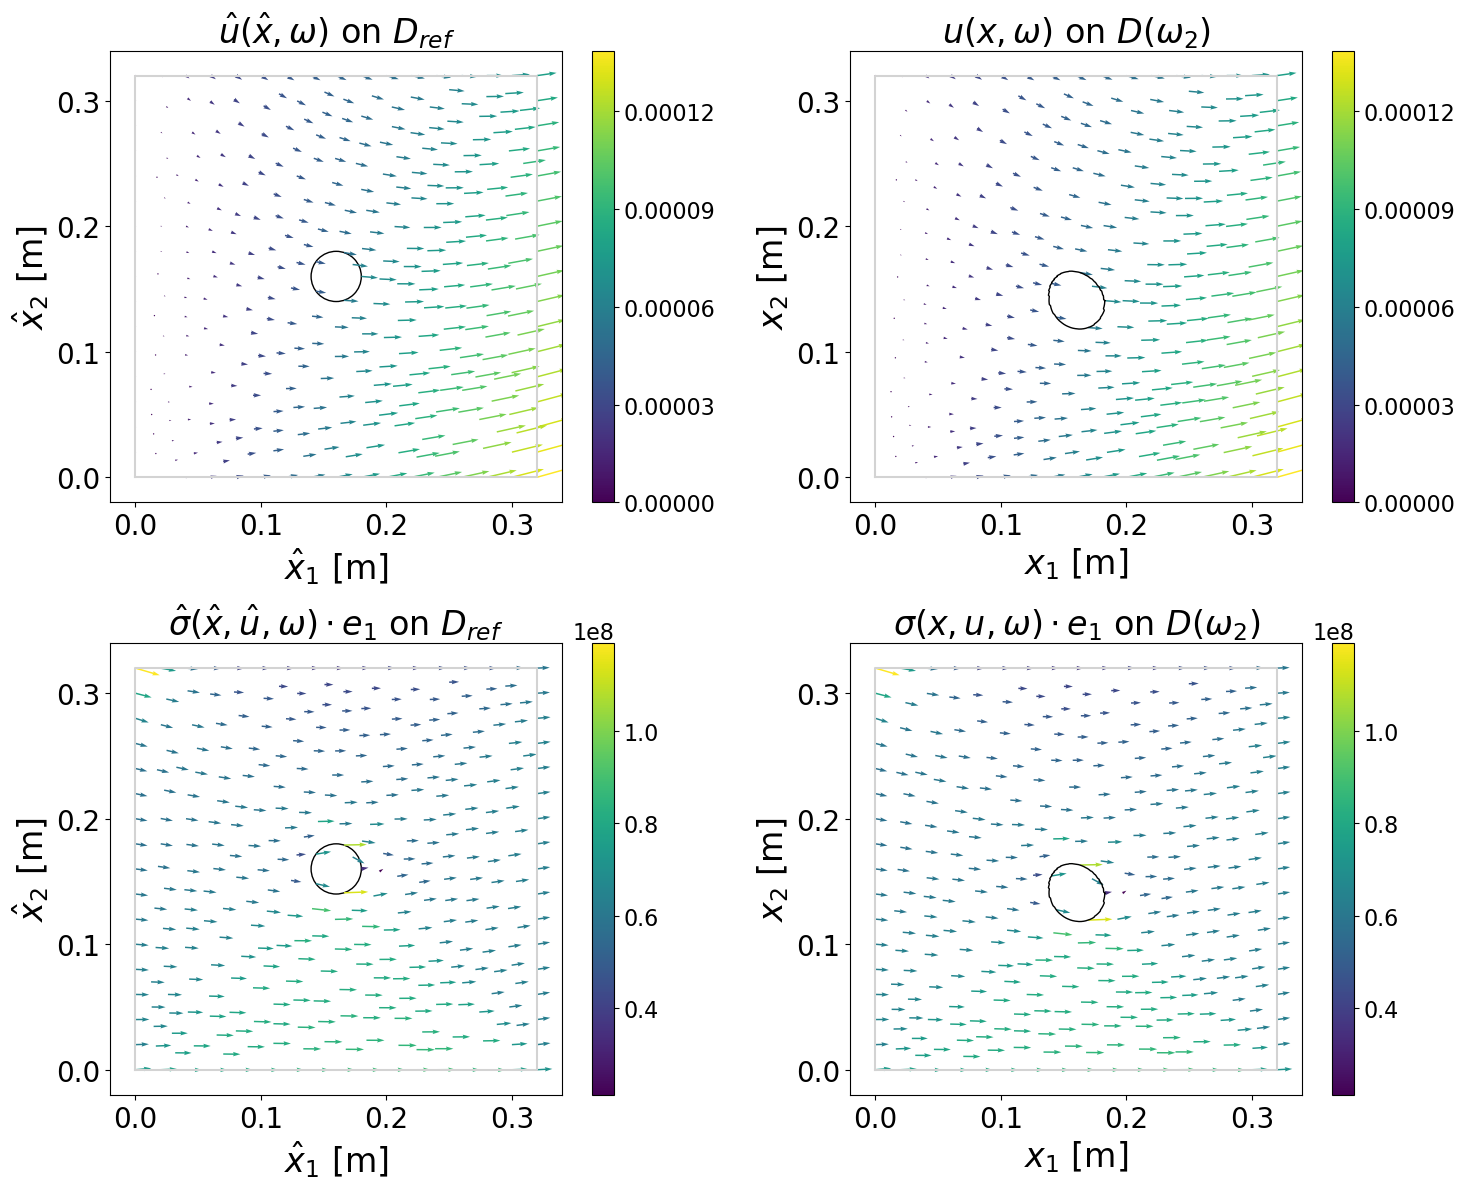

In [ ]:
"""Plot a sample of the solution of the PDE.
Create the image: images/6_steel_plate_problem/solution_sample_circle_random_field.png
Analyze time for a sample solution."""

start_time = time.time()
u_hat_data, sigma_hat_data = solve_model(mesh_resolution, omega1, omega2, q, randomFieldE, randomFieldVBar)
print(f"Time for one sample: {time.time() - start_time:.2f} seconds")

mesh = create_reference_mesh(mesh_resolution)
perturbed_mesh = perturb_mesh(mesh, omega2, 0.02, randomFieldVBar)

V = fe.VectorFunctionSpace(mesh, 'P', 1)
V_sigma = fe.TensorFunctionSpace(mesh, 'P', 1)
V_pert = fe.VectorFunctionSpace(perturbed_mesh, 'P', 1)
V_sigma_pert = fe.TensorFunctionSpace(perturbed_mesh, 'P', 1)

u_hat = fe.Function(V)
u_hat.vector()[:] = u_hat_data
u = fe.Function(V_pert)
u.vector()[:] = u_hat_data
sigma_hat = fe.Function(V_sigma)
sigma_hat.vector()[:] = sigma_hat_data
sigma = fe.Function(V_sigma_pert)
sigma.vector()[:] = sigma_hat_data


# Plot
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# u_hat
ax = plt.subplot(2, 2, 1)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u_hat)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{u}(\hat{x}, \omega)$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# u
ax = plt.subplot(2, 2, 2)
plt.plot(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], color='black', linewidth=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(u)
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$u(x, \omega)$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma_hat
ax = plt.subplot(2, 2, 3)
circle = plt.Circle((0.16, 0.16), 0.02, color='black', fill=False)
ax.add_artist(circle)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma_hat[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\hat{\sigma}(\hat{x}, \hat{u}, \omega) \cdot e_1$ on $D_{ref}$', fontsize=24)
ax.set_xlabel(r'$\hat{x}_1$ [m]', fontsize=24)
ax.set_ylabel(r'$\hat{x}_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

# sigma
ax = plt.subplot(2, 2, 4)
plt.plot(perturbed_circle_points[:, 0], perturbed_circle_points[:, 1], color='black', linewidth=1)
ax.plot([0, 0.32, 0.32, 0, 0], [0, 0, 0.32, 0.32, 0], color='lightgrey')
c = fe.plot(sigma[:, 0])
cbar = plt.colorbar(c, ax=ax)
cbar.ax.tick_params(labelsize=16)
cbar.locator = MaxNLocator(nbins=5)
cbar.update_ticks()
cbar.ax.yaxis.get_offset_text().set_fontsize(16)
ax.set_xlim(-0.02, 0.34)
ax.set_ylim(-0.02, 0.34)
ax.set_title(r'$\sigma(x, u, \omega) \cdot e_1$ on $D(\omega_2)$', fontsize=24)
ax.set_xlabel(r'$x_1$ [m]', fontsize=24)
ax.set_ylabel(r'$x_2$ [m]', fontsize=24)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.xaxis.set_major_locator(MaxNLocator(nbins=4))

plt.tight_layout()
plt.show()

/Users/elias/git/Masterthesis/steel_plate_problem/sp_6/sp_6_helper.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


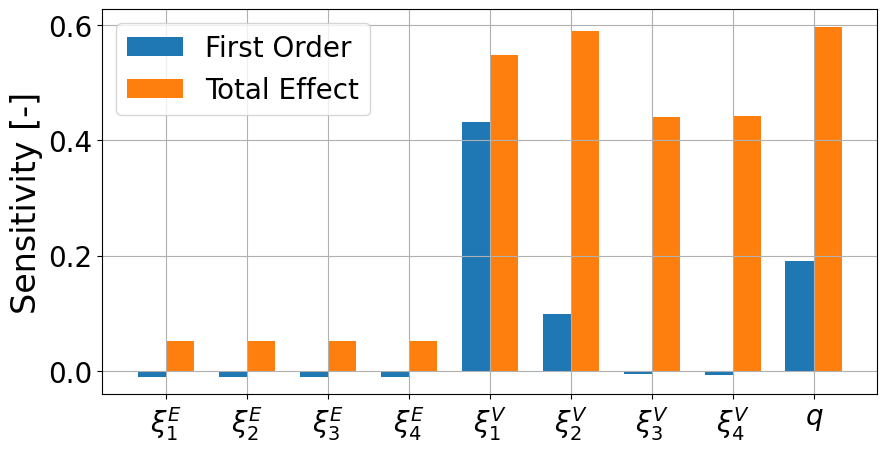

Sample size: 12000
S_single: [-0.00992426 -0.00992426 -0.00992426 -0.0096473   0.43252437  0.09918905
 -0.00479197 -0.00606431  0.19061338]
S_total: [0.05201011 0.05201011 0.05201011 0.05215632 0.54773762 0.58981043
 0.44037255 0.44285975 0.59694751]


In [ ]:
"""Plot the Sobol indices for the quantity of interest û.
Create the image: images/6_steel_plate_problem/sp_6_sobol_u_hat.png"""

S_single, S_total, mc_sample_size = sp_6_sobol_calc_indices_u_hat(fem_res=14, kl_res_e=6, kl_res_v=6, size_of_xi_e=4, size_of_xi_v=4)
sp_6_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)
print(f"S_single: {S_single}")
print(f"S_total: {S_total}")

/Users/elias/git/Masterthesis/steel_plate_problem/sp_6/sp_6_helper.py:1125: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_labels, fontsize=24)


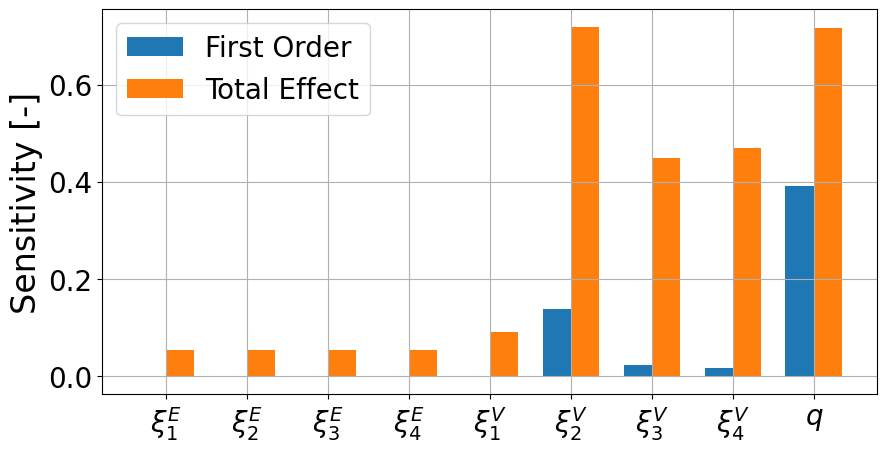

Sample size: 12000


In [ ]:
"""Plot the Sobol indices for the quantity of interest sigma_hat.
Create the image: images/6_steel_plate_problem/sp_6_sobol_sigma_hat.png"""

S_single, S_total, mc_sample_size = sp_6_sobol_calc_indices_sigma_hat(fem_res=14, kl_res_e=6, kl_res_v=6, size_of_xi_e=4, size_of_xi_v=4)
sp_6_plot_sobols(S_single=S_single, S_total=S_total, mc_sample_size=mc_sample_size, size_of_xi_e=4)
print(f"S_single: {S_single}")
print(f"S_total: {S_total}")

Building point search tree to accelerate distance queries.
Computed bounding box tree with 255 nodes for 128 points.


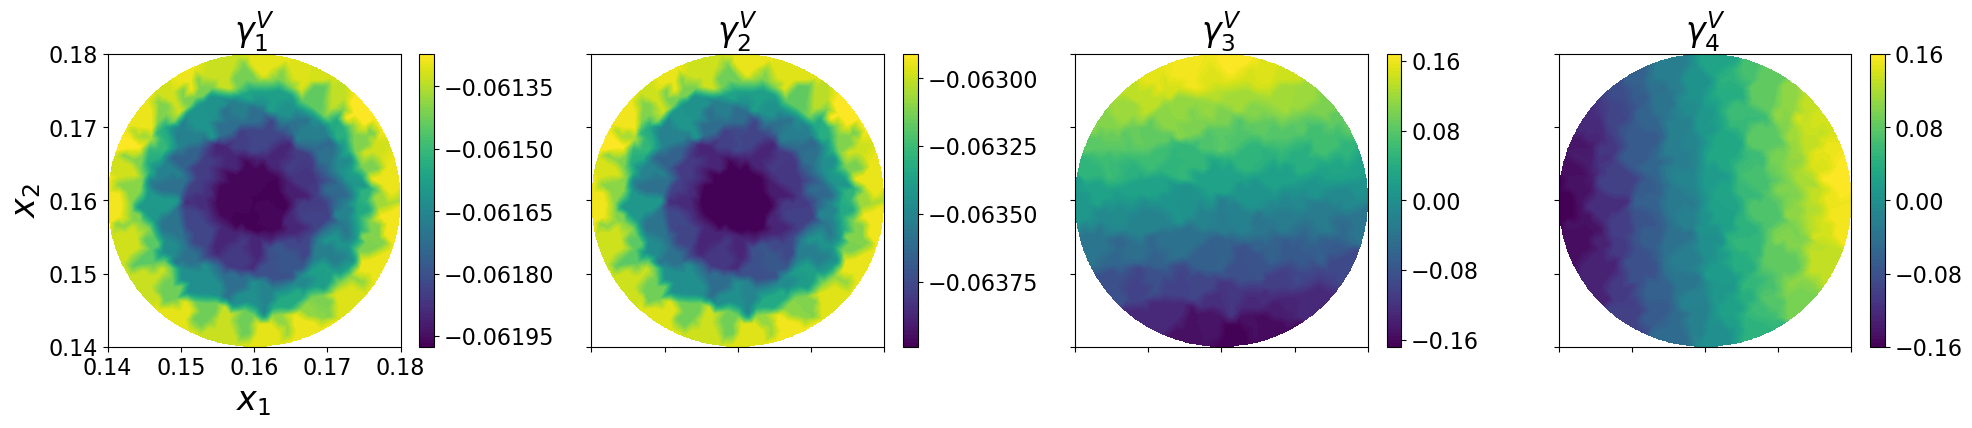

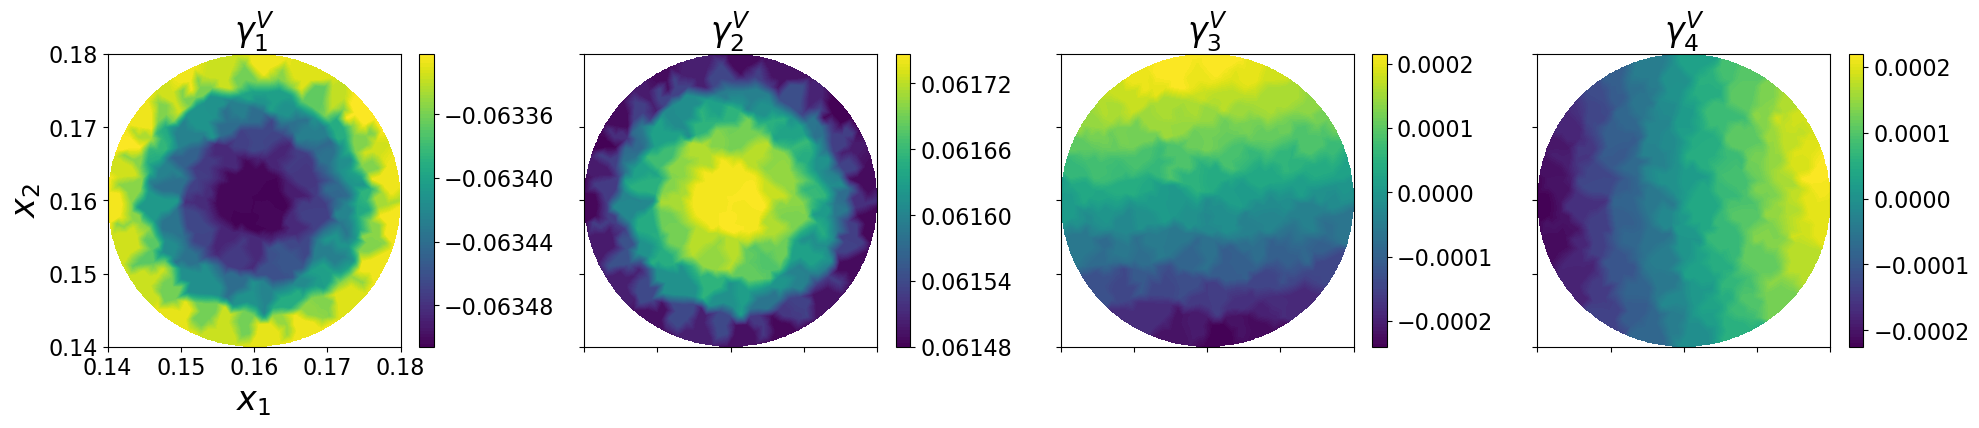

Eigenvalue 1: 0.07343682811259304
Eigenvalue 2: 0.04875201360012703
Eigenvalue 3: 0.0004695046266099265
Eigenvalue 4: 0.0004692252015292267


In [ ]:
"""Plot the eigenfunctions of the random field VBar.
Create the image: images/6_steel_plate_problem/eigenfunctions_v_first_component.png
Create the image: images/6_steel_plate_problem/eigenfunctions_v_second_component.png"""


randomFieldVBar = calculate_randomFieldVBar(6)

eval_eigenfunc_k = lambda x, k: np.array([sum([randomFieldVBar.basis_functions[j].function(np.array(x) - np.array([0.16, 0.16])) * randomFieldVBar.eigenvectors[j, k] for j in range(randomFieldVBar.N)]), 
                                          sum([randomFieldVBar.basis_functions[j].function(np.array(x) - np.array([0.16, 0.16])) * randomFieldVBar.eigenvectors[j + randomFieldVBar.N, k] for j in range(randomFieldVBar.N)])])

domain = mshr.Circle(fe.Point(0.16, 0.16), 0.02)
mesh = mshr.generate_mesh(domain, 20)

x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[0.14:0.18:500j, 0.14:0.18:500j]

columns = 4
# First component
fig, axs = plt.subplots(1, columns, figsize=(20, 4))

for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k)[0])

    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    ax.set_title(rf'$\gamma_{k+1}^V$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$x_1$', fontsize=24)
        ax.set_ylabel(r'$x_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


# Second component
fig, axs = plt.subplots(1, columns, figsize=(20, 4))
for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k)[1])
    
    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    ax.set_title(rf'$\gamma_{k+1}^V$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$x_1$', fontsize=24)
        ax.set_ylabel(r'$x_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_aspect('equal')
    

plt.tight_layout()
plt.show()

# Print first 4 eigenvalues
for i in range(4):
    print(f"Eigenvalue {i+1}: {randomFieldVBar.eigenvalues[i]}")

Building point search tree to accelerate distance queries.
Computed bounding box tree with 217 nodes for 109 points.


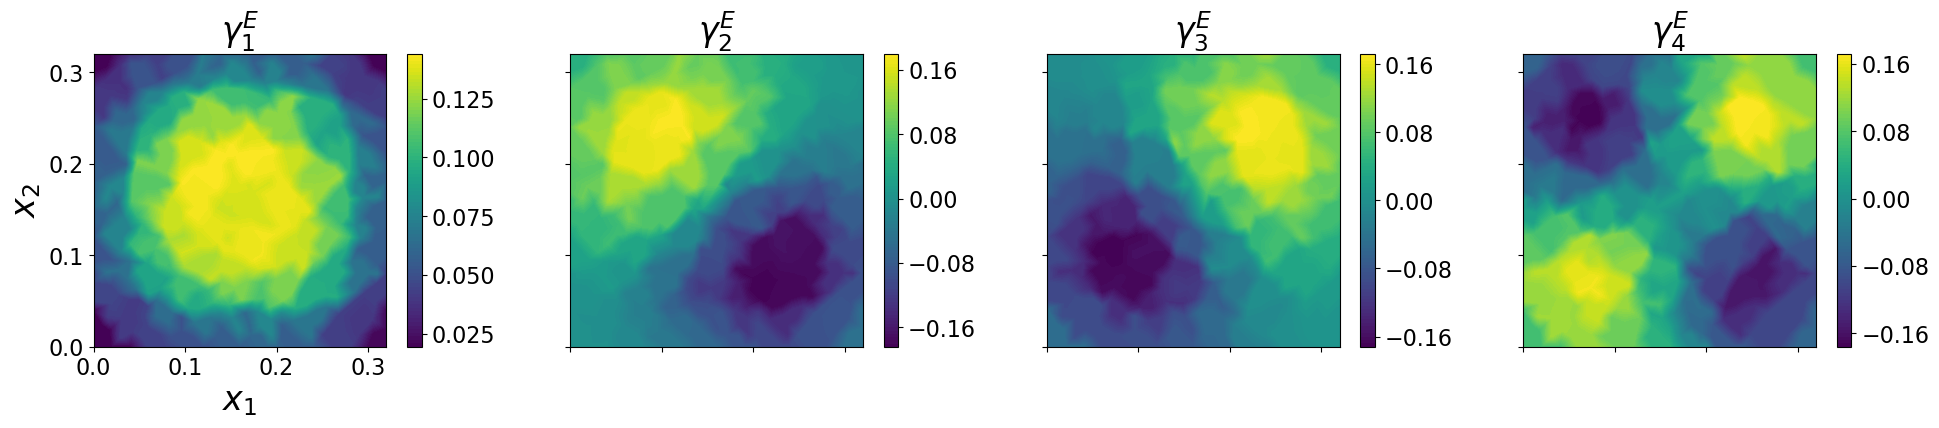

Eigenvalue 1: 5.032855936243348e-05
Eigenvalue 2: 4.499635820903043e-05
Eigenvalue 3: 4.464696738248568e-05
Eigenvalue 4: 3.9314862595714174e-05


In [ ]:
"""Plot the eigenfunctions of the random field Ê.
Create the image: images/6_steel_plate_problem/eigenfunctions_e.png"""

randomFieldE = calculate_randomFieldE(6)

eval_eigenfunc_k = lambda x, k: sum([randomFieldE.basis_functions[j].function(x) * randomFieldE.eigenvectors[j, k] for j in range(randomFieldE.N)])

mesh = create_reference_mesh(20)

x_coords = mesh.coordinates()[:, 0]
y_coords = mesh.coordinates()[:, 1]
grid_x, grid_y = np.mgrid[0:0.32:500j, 0:0.32:500j]

columns = 4
# First component
fig, axs = plt.subplots(1, columns, figsize=(20, 4))

for k in range(columns):
    ax = axs[k]
    z_values = []
    for i in range(len(x_coords)):
        z_values.append(eval_eigenfunc_k([x_coords[i], y_coords[i]], k))
    
    grid_z = griddata((x_coords, y_coords), z_values, (grid_x, grid_y), method='linear')
    cp = ax.contourf(grid_x, grid_y, grid_z, levels=100, cmap='viridis')
    cbar = plt.colorbar(cp)
    cbar.ax.tick_params(labelsize=16)
    cbar.locator = MaxNLocator(nbins=5)
    cbar.update_ticks()
    ax.set_title(rf'$\gamma_{k+1}^E$', fontsize=24)
    if k == 0:
        ax.set_xlabel(r'$x_1$', fontsize=24)
        ax.set_ylabel(r'$x_2$', fontsize=24)
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    ax.tick_params(axis='both', which='major', labelsize=16)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

# Print first 4 eigenvalues
for i in range(4):
    print(f"Eigenvalue {i+1}: {randomFieldE.eigenvalues[i]}")